In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from graphviz import Digraph
from sklearn.metrics import r2_score

 Normal distribution -- eclipse 
 Exponential distribution -- diamond


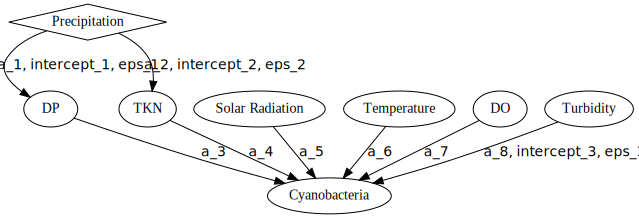

In [2]:
print(" Normal distribution -- eclipse \n Exponential distribution -- diamond" )
dot = Digraph(comment='A simple Graph')
dot.node('A', 'Precipitation', shape='diamond')
dot.node('B', 'DP')
dot.node('C', 'TKN')
dot.node('D', 'Solar Radiation')
dot.node('E', 'Temperature')
dot.node('F', 'DO')
dot.node('G', 'Turbidity')
dot.node('H', 'Cyanobacteria')
dot.edge("A", "B", label="a_1, intercept_1, eps_1", fontname="Calibri")
dot.edge("A", "C", label="a_2, intercept_2, eps_2", fontname="Calibri")
dot.edge("B", "H", label="a_3", fontname="Calibri")
dot.edge("C", "H", label="a_4", fontname="Calibri")
dot.edge("D", "H", label="a_5", fontname="Calibri")
dot.edge("E", "H", label="a_6", fontname="Calibri")
dot.edge("F", "H", label="a_7", fontname="Calibri")
dot.edge("G", "H", label="a_8, intercept_3, eps_3", fontname="Calibri")
dot.format = 'png'
#dot.edges(['AB', 'AC','BH','CH','DH','EH','FH','GH'])
dot.render('graph1', view=False) 
dot

 Normal distribution -- eclipse 
 Exponential distribution -- diamond


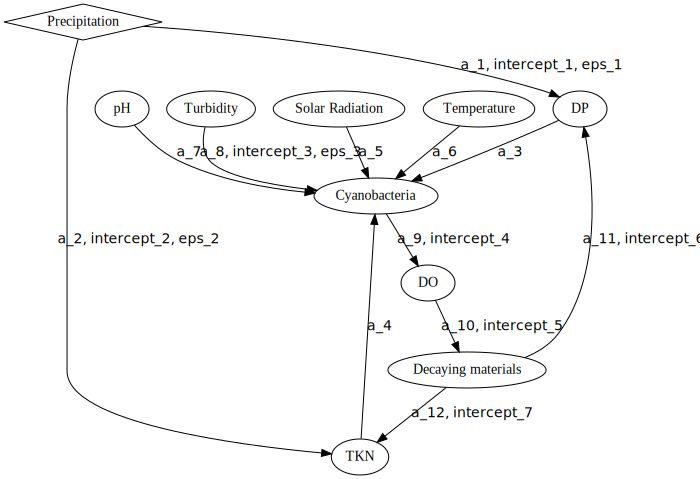

In [3]:
print(" Normal distribution -- eclipse \n Exponential distribution -- diamond" )
dot = Digraph(comment='A simple Graph')
dot.node('A', 'Precipitation', shape='diamond')
dot.node('B', 'DP')
dot.node('C', 'TKN')
dot.node('D', 'Solar Radiation')
dot.node('E', 'Temperature')
dot.node('F', 'pH')
dot.node('G', 'Turbidity')
dot.node('H', 'Cyanobacteria')
dot.node('I','DO')
dot.node('J','Decaying materials')
dot.edge("A", "B", label="a_1, intercept_1, eps_1", fontname="Calibri")
dot.edge("A", "C", label="a_2, intercept_2, eps_2", fontname="Calibri")
dot.edge("B", "H", label="a_3", fontname="Calibri")
dot.edge("C", "H", label="a_4", fontname="Calibri")
dot.edge("D", "H", label="a_5", fontname="Calibri")
dot.edge("E", "H", label="a_6", fontname="Calibri")
dot.edge("F", "H", label="a_7", fontname="Calibri")
dot.edge("G", "H", label="a_8, intercept_3, eps_3", fontname="Calibri")
dot.edge("H", "I", label="a_9, intercept_4",fontname="Calibri")
dot.edge("I", "J", label="a_10, intercept_5",fontname="Calibri")
dot.edge("J", "B", label="a_11, intercept_6", fontname="Calibri")
dot.edge("J", "C", label="a_12, intercept_7", fontname="Calibri")
dot.format = 'png'
#dot.edges(['AB', 'AC','BH','CH','DH','EH','FH','GH'])
dot.render('graph2', view=False) 
dot

In [4]:
#Gaussian Linear Bayesian Network

In [5]:
df=pd.read_csv("cyano_train.csv")
df=df.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df.head()

,Unnamed: 0,prec,solar,Date,sin,cos,DO,elev,pH,Spc,...,DP,TP,TN,FC,Chl-a,Fe,SSC,TNTP,NONH,Cyano
0,0,0.00,16.81,2014-09-16,-0.97,-0.25,7.96,1420.94,8.19,896.0,...,0.060,0.080,0.701,2.0,20.7,600,41,8.76,0.81,12966
1,1,0.24,27.43,2007-08-07,-0.59,-0.81,6.08,1422.54,8.45,755.0,...,0.129,0.186,0.795,1.0,18.8,890,16,4.27,1.40,1127
2,2,0.08,28.01,2009-06-23,0.15,-0.99,7.47,1421.98,8.35,763.0,...,0.110,0.160,1.096,1.0,29.1,900,18,6.85,26.67,1437
3,3,0.03,11.02,2006-04-25,0.92,-0.40,8.48,1421.55,8.33,862.0,...,0.040,0.090,1.039,4.0,11.1,200,34,11.54,1.25,4196
4,4,0.03,19.97,2012-03-12,0.95,0.33,11.60,1418.89,8.76,915.0,...,0.060,0.110,0.775,4.0,32.3,690,23,7.05,2.10,1


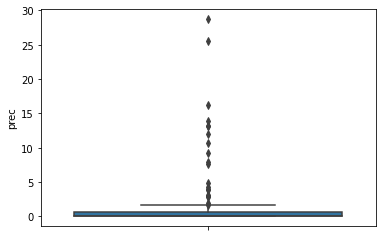

In [6]:
#boxplot and exclude outliers using z-score
df_prec = pd.DataFrame(df['prec'])
sns.boxplot(y='prec', data=df)
df_prec['z_score']=stats.zscore(df_prec['prec'])
df_prec=df_prec.loc[df_prec['z_score'].abs()<=3]

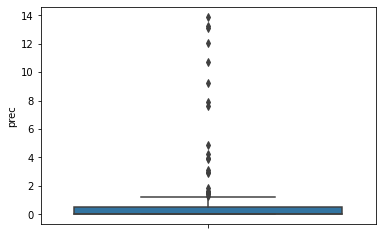

In [7]:
#boxplot after removing the outliers
sns.boxplot(y='prec', data=df_prec)

([<matplotlib.axis.YTick at 0x7f956c3c13a0>],
 <a list of 1 Text major ticklabel objects>)

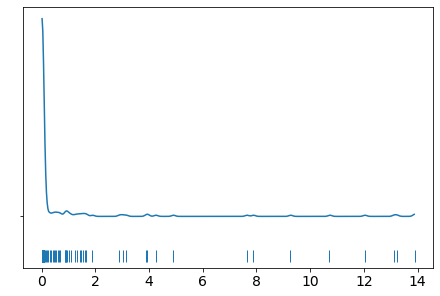

In [8]:
#kde plot
az.plot_kde(df_prec['prec'].values, rug=True)
plt.yticks([0], alpha=0)

In [9]:
#Build the model of precipitation
with pm.Model() as model_prec:
    lambda_1 = pm.Normal("lambda_1", mu = 3, sd=1)
    precipitation = pm.Exponential("precipitation", lam=lambda_1, observed = df_prec['prec'])
with model_prec:
    trace_prec = pm.sample(1000, tune=1000, cores=3)
az.plot_trace(trace_prec)

/opt/anaconda3/lib/python3.8/site-packages/pymc3/distributions/continuous.py:138: UserWarning: The variable specified for lam has negative support for Exponential, likely making it unsuitable for this parameter.
  warnings.warn(msg)
<ipython-input-9-b6cbf922395a>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_prec = pm.sample(1000, tune=1000, cores=3)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [lambda_1]


KeyboardInterrupt: 

In [ ]:
prec=az.summary(trace_prec)
prec

In [ ]:
#evaluation metrics to see if NUTS sampler converged.
bfmi = np.max(pm.stats.bfmi(trace_prec))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_prec).values()).values
(
    pm.energyplot(trace_prec, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)
#bfmi:Bayesian fraction of missing information,
#Reference:https://arxiv.org/pdf/1604.00695.pdf
#"in the worst case BFMI → 0 and the momentum resampling induces very slow exploration across the level sets, while in the best case BFMI → 1 and the momentum resampling effectively generates exact draws from the marginal energy distribution."

In [ ]:
#HDP intervals
az.plot_posterior(trace_prec)

In [ ]:
#DP
az.plot_kde(df['DP'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#boxplot and log transform
df_dp = pd.DataFrame(df['DP'])
df_dp['DP']=df_dp['DP'].apply(np.log)
sns.boxplot(y='DP', data=df_dp)
#do not need to remove outliers

In [ ]:
#replot distribution
az.plot_kde(df_dp['DP'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Build the model for DP
with pm.Model() as model_dp:
    #model of parameters
    a_1 = pm.Normal("a_1", mu=0, sd=1)
    intercept_1 = pm.Normal("intercept_1", mu=0, sd=1)
    eps_1 = pm.HalfCauchy('eps_1', 5.)
    #deterministic model
    mu_1 = pm.Deterministic("mu_1", a_1*df['prec']+intercept_1)
    #likelihood
    dp=pm.Normal("dp", mu=mu_1, sd=eps_1, observed = df_dp['DP'])
    trace_dp = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_dp, var_names=['a_1', 'intercept_1', 'eps_1'])

In [ ]:
dp = az.summary(trace_dp).head(3)
dp

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_dp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_dp).values()).values
(
    pm.energyplot(trace_dp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
#TKN
az.plot_kde(df['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#boxplot and log transform
df_tkn = df[['prec','TKN']]
df_tkn['TKN']=df_tkn['TKN'].apply(np.log)
sns.boxplot(y='TKN', data=df_tkn)

In [ ]:
#re-boxplot
df_tkn['z_score']=stats.zscore(df_tkn['TKN'])
df_tkn=df_tkn.loc[df_tkn['z_score'].abs()<=3]
sns.boxplot(y='TKN', data=df_tkn)

In [ ]:
#replot log
az.plot_kde(df_tkn['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Build the model for TKN
with pm.Model() as model_tkn:
    #model of parameters
    a_2 = pm.Normal("a_2", mu=0, sd=1)
    intercept_2 = pm.Normal("intercept_2", mu=0, sd=1)
    eps_2 = pm.HalfCauchy('eps_2', 5.)
    #deterministic model  
    mu_2 = pm.Deterministic("mu_2", a_2*df_tkn['prec']+intercept_2)
    #likelihood
    tkn=pm.Normal("tkn", mu=mu_2, sd=eps_2, observed = df_tkn['TKN'])
    trace_tkn = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_tkn, var_names=['a_2', 'intercept_2', 'eps_2'])

In [ ]:
tkn = az.summary(trace_tkn).head(3)
tkn

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_tkn))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_tkn).values()).values
(
    pm.energyplot(trace_tkn, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
#DO
az.plot_kde(df['pH'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
sns.boxplot(y='pH', data=df)

In [ ]:
df_ph = df[['pH']]
df_ph['ph']=df_ph['pH'].apply(np.log)
sns.boxplot(y='pH', data=df_ph)

In [ ]:
az.plot_kde(df_ph['pH'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Build the model for pH
with pm.Model() as model_ph:
    #model of parameters
    mu_3 = pm.Uniform("mu_3", lower=8.2, upper=8.4)
    sigma_3 = pm.HalfNormal('sigma_3', sd=1)
    #likelihood
    ph=pm.Normal("ph", mu=mu_3, sd=sigma_3, observed = df_ph['pH'])
    trace_ph = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_ph, var_names=['mu_3', 'sigma_3'])

In [ ]:
ph=az.summary(trace_ph)
ph

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_ph))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_ph).values()).values
(
    pm.energyplot(trace_ph, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
#Turbidity
az.plot_kde(df['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
sns.boxplot(y='Turb', data=df)

In [ ]:
df_turb = df[['Turb']]
df_turb['Turb']=df_turb['Turb'].apply(np.log)
df_turb['z_score']=stats.zscore(df_turb['Turb'])
df_turb=df_turb.loc[df_turb['z_score'].abs()<=3]
sns.boxplot(y='Turb', data=df_turb)

In [ ]:
az.plot_kde(df_turb['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Build the model for Turbidity
with pm.Model() as model_turb:
    #model of parameters
    mu_4 = pm.Uniform("mu_4", lower=2.5, upper=3.5)
    sigma_4 = pm.HalfNormal('sigma_4', sd=1)
    #likelihood
    turb = pm.Normal("turb", mu=mu_4, sd=sigma_4, observed = df_turb['Turb'])
    trace_turb = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_turb, var_names=['mu_4', 'sigma_4'])

In [ ]:
turb=az.summary(trace_turb)
turb

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_turb))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_turb).values()).values
(
    pm.energyplot(trace_turb, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
az.plot_joint(trace_turb, kind='kde', fill_last=False)

In [11]:
df_sp = pd.read_csv("solar&prec.csv")
df_sp=df_sp.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df_sp.head()

,LAT,LON,YEAR,MO,DY,prec,solar,Date
0,37.72531,-97.79759,2002,8,7,0.00,22.07,2002-08-07
1,37.72531,-97.79759,2002,8,8,0.18,23.90,2002-08-08
2,37.72531,-97.79759,2002,8,9,4.11,17.39,2002-08-09
3,37.72531,-97.79759,2002,8,10,1.27,11.70,2002-08-10
4,37.72531,-97.79759,2002,8,11,14.62,23.22,2002-08-11


In [12]:
#solar radiation
solar = pd.DataFrame(df_sp[['solar', 'MO']])
solar['z_score']=stats.zscore(solar['solar'])
solar=solar.loc[solar['z_score'].abs()<=3]
summer = solar.loc[(solar['MO'] >3) & (solar['MO']<10)]
winter = solar.loc[(solar['MO'] <4) | (solar['MO']>9)]

In [ ]:
az.plot_kde(summer['solar'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
az.plot_kde(winter['solar'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-21-24c0efa37057>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_solar = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma_6, sigma_5, mu_6, mu_5]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 28 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-21-24c0efa37057>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])


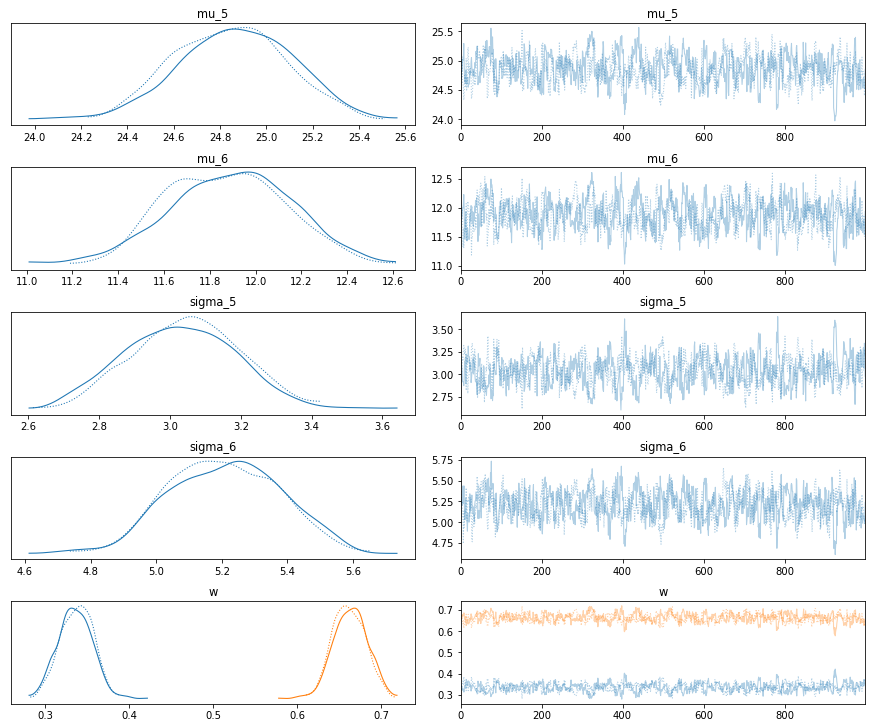

In [21]:
with model_solar:
    trace_solar = pm.sample(1000, cores=1)
    pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])
    ppc_trace = pm.sample_posterior_predictive(trace_solar, var_names=["like"], keep_size=True)

In [26]:
trace_solar.add_groups(posterior_predictive=ppc_trace)
az.plot_ppc(trace_solar)

AttributeError: 'MultiTrace' object has no attribute 'add_groups'

In [16]:
solar=az.summary(trace_solar)
solar

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_5,24.830,0.247,24.345,25.269,0.014,0.010,326.0,485.0,1.01
mu_6,11.855,0.260,11.384,12.371,0.015,0.010,317.0,504.0,1.01
sigma_5,3.058,0.160,2.778,3.365,0.009,0.006,332.0,562.0,1.01
sigma_6,5.189,0.166,4.859,5.485,0.009,0.006,335.0,537.0,1.01
w[0],0.339,0.020,0.303,0.378,0.001,0.001,318.0,498.0,1.01
w[1],0.661,0.020,0.622,0.697,0.001,0.001,318.0,498.0,1.01


In [15]:
trace_solar.add_groups(posterior_predictive=ppc_trace)
az.plot_ppc(trace_solar)

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_solar))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_solar).values()).values
(
    pm.energyplot(trace_solar, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
df_temp = pd.read_csv("temperature.csv")
df_temp=df_temp.rename(columns={"T2M": "temp"})
df_temp.head()

In [ ]:
#Temperature
temp = pd.DataFrame(df_temp[['temp', 'MO']])
temp['z_score']=stats.zscore(temp['temp'])
temp=temp.loc[temp['z_score'].abs()<=3]
summer = temp.loc[(temp['MO'] >3) & (temp['MO']<10)]
winter = temp.loc[(temp['MO'] <4) | (temp['MO']>9)]

In [ ]:
az.plot_kde(summer['temp'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
az.plot_kde(winter['temp'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Mixture model of solar radiation
with pm.Model() as model_temp:
    mu_7 = pm.Uniform('mu_7', lower = 20, upper = 30)
    mu_8 = pm.Uniform('mu_8', lower = 5, upper = 15)
    sigma_7 = pm.HalfNormal('sigma_7', sd=1)
    sigma_8 = pm.HalfNormal('sigma_8', sd=1)
    norm_7 = pm.Normal.dist(mu=mu_7, sd=sigma_7)
    norm_8 = pm.Normal.dist(mu=mu_8, sd=sigma_8)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists = [norm_7, norm_8], observed=temp['temp'])
    trace_temp = pm.sample(1000, cores=1)
    pm.traceplot(trace_temp, var_names=['mu_7', 'mu_8','sigma_7','sigma_8','w'])

In [ ]:
temp=az.summary(trace_temp)
temp

In [ ]:
bfmi = np.max(pm.stats.bfmi(trace_temp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_temp).values()).values
(
    pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [ ]:
#Cyanobacter
df_cyano = pd.DataFrame(df[['Cyano','DP','TKN','solar','Temp','Turb','pH','DO']])
sns.boxplot(y='Cyano', data=df_cyano)
df_cyano['Cyano']=df_cyano['Cyano'].apply(np.log)
df_cyano['DP']=df_cyano['DP'].apply(np.log)
df_cyano['TKN']=df_cyano['TKN'].apply(np.log)
df_cyano['DO']=df_cyano['pH'].apply(np.log)
df_cyano['Turb']=df_cyano['Turb'].apply(np.log)
df_cyano['z_score']=stats.zscore(df_cyano['Cyano'])
df_cyano=df_cyano.loc[df_cyano['z_score'].abs()<=1.5]

In [ ]:
az.plot_kde(df_cyano['Cyano'].values, rug=True)
plt.yticks([0], alpha=0)

In [ ]:
#Build the model for Cyanobacteria abundance
solar_shared=shared(df_cyano['solar'].values)
temp_shared=shared(df_cyano['Temp'].values)
tkn_shared=shared(df_cyano['TKN'].values)
do_shared=shared(df_cyano['DO'].values)
dp_shared=shared(df_cyano['DP'].values)
turb_shared=shared(df_cyano['Turb'].values)
with pm.Model() as model_cyano:
    #model of parameters
    a_3 = pm.Normal("a_3", mu=0, sd=1)
    a_4 = pm.Normal("a_4", mu=0, sd=1)
    a_5 = pm.Normal("a_5", mu=0, sd=1)
    a_6 = pm.Normal("a_6", mu=0, sd=1)
    a_7 = pm.Normal("a_7", mu=0, sd=1)
    a_8 = pm.Normal("a_8", mu=0, sd=1)
    intercept_3 = pm.Normal("intercept_3", mu=0, sd=1)
    eps_3 = pm.HalfCauchy('eps_3', 5.)
    #deterministic model
    mu_9 = pm.Deterministic("mu_9", a_3*solar_shared+a_4*temp_shared+a_5*tkn_shared+a_6*do_shared+a_7*dp_shared+a_8*turb_shared+intercept_3)
    #likelihood
    cyano = pm.Normal("cyano", mu= mu_9, sd=eps_3, observed = df_cyano['Cyano'])
    trace_cyano = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_cyano, var_names=['a_3', 'a_4', 'a_5', 'a_6', 'a_7','a_8','intercept_3', 'eps_3'])

In [ ]:
cyano=az.summary(trace_cyano).head(8)
cyano

In [ ]:
df_test=pd.read_csv("cyano_test.csv")
df_test=df_test.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df_test['Cyano']=df_test['Cyano'].apply(np.log)
df_test['DP']=df_test['DP'].apply(np.log)
df_test['TKN']=df_test['TKN'].apply(np.log)
df_test['DO']=df_test['DO'].apply(np.log)
df_test['Turb']=df_test['Turb'].apply(np.log)

In [ ]:
solar_shared.set_value(df_test['solar'])
temp_shared.set_value(df_test['Temp'])
tkn_shared.set_value(df_test['TKN'])
do_shared.set_value(df_test['DO'])
dp_shared.set_value(df_test['DP'])
turb_shared.set_value(df_test['Turb'])

In [ ]:
ppc=pm.sample_posterior_predictive(trace_cyano, model=model_cyano, samples=500)

In [ ]:
#hmc_posterior_pred = pm.sample_ppc(hmc_trace, 1000, model)
#hmc_predictions = np.mean(hmc_posterior_pred['y'], axis=0)
predictions = np.mean(ppc['cyano'],axis=0)

In [ ]:
pred=np.exp(predictions)

In [ ]:
true=np.exp(df_test['Cyano'])

In [ ]:
r2_score(df_test['Cyano'], predictions)

In [ ]:
plt.errorbar(x=df_test['TKN'], y=np.asarray(ppc['cyano']).mean(axis=0), yerr=np.asarray(ppc['cyano']).std(axis=0), linestyle='', marker='o')
plt.plot(df_test['TKN'],df_test['Cyano'], 'o')
#plt.ylim(-.05, 1.05)
plt.xlabel('TKN')
plt.ylabel('Cyanobacteria')
plt.savefig('prediction_result.png')

In [ ]:
def rmse(predictions, targets): 

    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(pred, true)